In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from utils.RegionSelect import *
%matplotlib inline

# Read in the image
image = mpimg.imread('test.jpg')

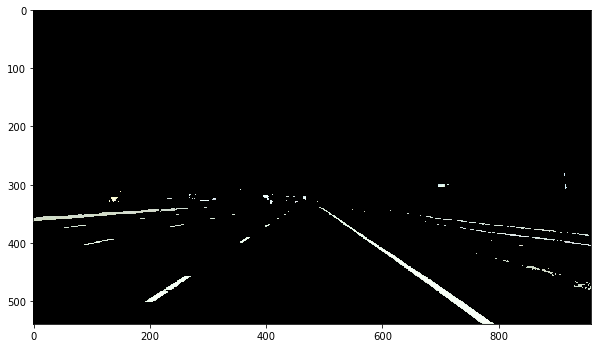

In [2]:
color_select = np.copy(image)
# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 202
green_threshold = 204
blue_threshold = 190
######
rgb_threshold = [red_threshold, green_threshold, blue_threshold]
color_select, color_thresholds = ColorSelect(image, rgb_threshold)

# Display the image 
plt.figure(figsize=(10,10))
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.jpg", color_select)

# Region Masking

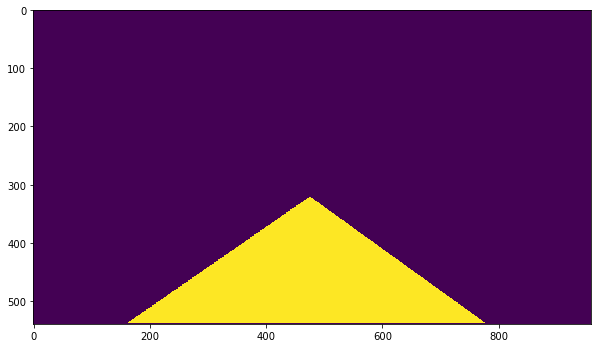

In [16]:
left_bottom = [160, 539]
right_bottom = [780, 539]
apex = [476, 320]

region_select, mask = TriangularRegionSelect(image, left_bottom, right_bottom, apex)

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(mask)

In [18]:
mask.shape

(540, 960)

In [26]:
import cv2
def PolyRegionSelect(image, vertices):    
    region_mask = np.zeros(image.shape)
    region_select = cv2.fillPoly(image, vertices, [255, 0, 0])
    region_mask = cv2.fillPoly(region_mask, vertices, [1, 0, 0])[:,:,0].astype(bool)
    return region_select, region_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

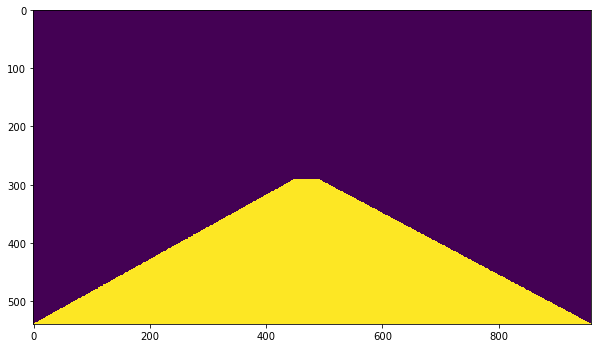

In [28]:
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
region_select, region_mask = PolyRegionSelect(image, vertices)
plt.figure(figsize=(10,10))
plt.imshow(region_mask)
region_mask

# Quiz 2

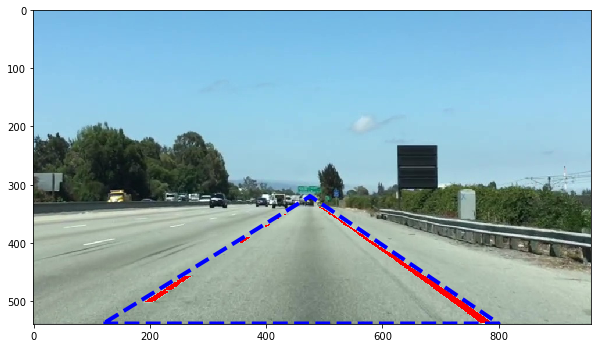

In [4]:
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [476, 320]
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

line_image, color_select = TriangularRegionAndColorSelect(image, left_bottom, right_bottom, apex, rgb_threshold)

# Display the image and show region and color selections
plt.figure(figsize=(10,10))
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)